# **Construindo um Modelo com Tensorflow -  🐶 🐱!**

**Problema: uma imagem, dizer se é um dog ou um cat.**

Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

* **Treinamento**: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
* **Teste**: 1.000 imagens de dogs e cats.

Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Por fim, o modelo de duas camadas de convolução seguidas de pooling, a camada de flattening, e as camadas totalmente conectadas (Dense), com a função de ativação sigmoid para a saída binária.

**Não há mágica. Há matemática!** 🧙

In [50]:
!rm -rf /content/dogs-vs-cats

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pedrokall","key":"ca1ac928b2c5a8e68bce06ec55ca5a9e"}'}

**Fonte de dados**

O Kaggle oferece diversos datasets públicos que podem ser usados para você desenvolver seus projetos e incluir no seu portfólio, uma excelente forma de demonstrar suas habilidades em Data Science e Machine Learning. Usaremos como fonte de dados, o famoso [dataset Dogs and Cats](https://www.kaggle.com/c/dogs-vs-cats/data).

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Permissões necessárias

In [3]:
!kaggle competitions download -c dogs-vs-cats

In [51]:
!unzip dogs-vs-cats.zip -d /content/dogs-vs-cats

Archive:  dogs-vs-cats.zip
  inflating: /content/dogs-vs-cats/sampleSubmission.csv  
  inflating: /content/dogs-vs-cats/test1.zip  
  inflating: /content/dogs-vs-cats/train.zip  


In [52]:
import pandas as pd
df = pd.read_csv('/content/dogs-vs-cats/sampleSubmission.csv')
df.head()

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


**Carregando os dados de Treino e Teste**

In [53]:
!unzip /content/dogs-vs-cats/test1.zip -d /content/dogs-vs-cats/test1

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: /content/dogs-vs-cats/test1/test1/5499.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/55.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/550.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5500.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5501.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5502.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5503.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5504.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5505.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5506.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5507.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5508.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5509.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/551.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5510.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5511.jpg  
  inflating: /con

In [54]:
!unzip /content/dogs-vs-cats/train.zip -d /content/dogs-vs-cats/train

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: /content/dogs-vs-cats/train/train/dog.5499.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.55.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.550.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5500.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5501.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5502.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5503.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5504.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5505.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5506.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5507.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5508.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5509.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.551.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5510.jpg  
  inflating: /c

In [55]:
# Mover a pasta test1 interna para o diretório principal
!mv /content/dogs-vs-cats/test1/test1/* /content/dogs-vs-cats/test1/

# Mover a pasta train interna para o diretório principal
!mv /content/dogs-vs-cats/train/train/* /content/dogs-vs-cats/train/

In [56]:
# Remove a pasta test1 vazia (nível 2)
!rm -rf /content/dogs-vs-cats/test1/test1

# Remove a pasta train vazia (nível 2)
!rm -rf /content/dogs-vs-cats/train/train

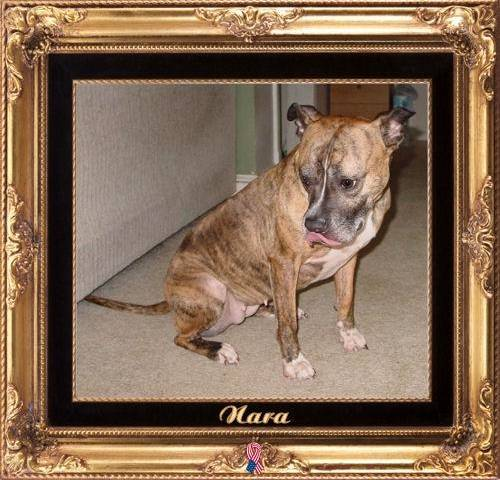

In [57]:
# Do dataset de treino, carregue uma imagem de cachorro
from IPython.display import Image
Image(filename='/content/dogs-vs-cats/train/dog.98.jpg')


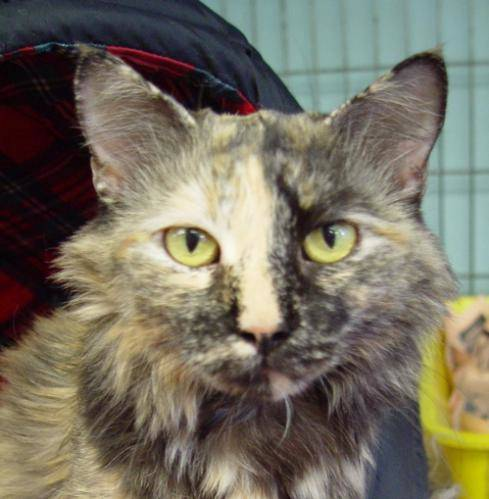

In [58]:
# Do dataset de treino, carregue uma imagem de gato
from IPython.display import Image
Image(filename='/content/dogs-vs-cats/train/cat.10.jpg')

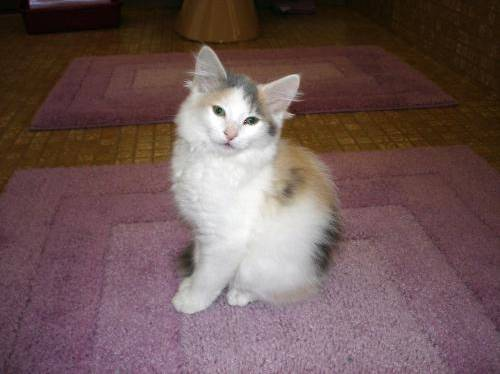

In [59]:
# Do dataset de teste, carregue uma imagem de gato ou de cachorro
from IPython.display import Image
Image(filename='/content/dogs-vs-cats/test1/10.jpg')

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.

In [62]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, random_split, Subset
from torchvision import datasets, models, transforms
import torchvision.transforms.functional as TF


In [63]:
BATCH_SIZE = 32
NUM_EPOCHS = 10
LEARNING_RATE = 0.001
RANDOM_SEED = 42
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cuda


In [64]:
DATA_DIR = '/content/dogs-vs-cats'
TRAIN_DIR = os.path.join(DATA_DIR, 'train')
MODEL_SAVE_PATH = os.path.join(DATA_DIR, 'melhor_modelo.pth')

In [65]:
import os
import shutil

# Definir caminhos
base_dir = '/content/dogs-vs-cats/train'  # Pasta principal com as imagens
cat_dir = os.path.join(base_dir, 'gato')    # Pasta para gatos
dog_dir = os.path.join(base_dir, 'cachorro')    # Pasta para cachorros

# Criar pastas de destino (se não existirem)
os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

# Organizar as imagens
for filename in os.listdir(base_dir):
    if filename.lower().startswith('cat'):  # Se começar com "cat"
        src = os.path.join(base_dir, filename)
        dst = os.path.join(cat_dir, filename)
        shutil.move(src, dst)
        print(f'Movido {filename} para {cat_dir}')
    elif filename.lower().startswith('dog'):  # Se começar com "dog"
        src = os.path.join(base_dir, filename)
        dst = os.path.join(dog_dir, filename)
        shutil.move(src, dst)
        print(f'Movido {filename} para {dog_dir}')

print("Organização concluída!")

A saída de streaming foi truncada nas últimas 5000 linhas.
Movido cat.9557.jpg para /content/dogs-vs-cats/train/gato
Movido dog.288.jpg para /content/dogs-vs-cats/train/cachorro
Movido dog.4900.jpg para /content/dogs-vs-cats/train/cachorro
Movido cat.9817.jpg para /content/dogs-vs-cats/train/gato
Movido cat.11577.jpg para /content/dogs-vs-cats/train/gato
Movido dog.4104.jpg para /content/dogs-vs-cats/train/cachorro
Movido dog.8237.jpg para /content/dogs-vs-cats/train/cachorro
Movido dog.392.jpg para /content/dogs-vs-cats/train/cachorro
Movido cat.268.jpg para /content/dogs-vs-cats/train/gato
Movido cat.6617.jpg para /content/dogs-vs-cats/train/gato
Movido dog.1484.jpg para /content/dogs-vs-cats/train/cachorro
Movido dog.3896.jpg para /content/dogs-vs-cats/train/cachorro
Movido dog.10529.jpg para /content/dogs-vs-cats/train/cachorro
Movido dog.12351.jpg para /content/dogs-vs-cats/train/cachorro
Movido cat.7385.jpg para /content/dogs-vs-cats/train/gato
Movido dog.3111.jpg para /content/d

**Transformadas para data aug**


In [67]:
def get_transforms():
    # Transformações para o conjunto de treino
    train_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    val_test_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    return train_transforms, val_test_transforms


### Carregar os datasets e criação de dataloaders

In [68]:
def load_data():
    # Obtém as transformações
    train_transforms, val_test_transforms = get_transforms()

    # Carrega o dataset completo
    full_dataset = datasets.ImageFolder(root=TRAIN_DIR, transform=None)

    # Definir semente para reprodutibilidade
    torch.manual_seed(RANDOM_SEED)
    np.random.seed(RANDOM_SEED)
    random.seed(RANDOM_SEED)

    # Obter índices por classe
    cat_indices = [i for i, (_, label) in enumerate(full_dataset.samples) if label == 0]  # gatos
    dog_indices = [i for i, (_, label) in enumerate(full_dataset.samples) if label == 1]  # cachorros

    # Embaralhar os índices
    random.shuffle(cat_indices)
    random.shuffle(dog_indices)

    # Separar índices para treino (400 por classe), validação (50 por classe) e teste (50 por classe)
    train_indices = cat_indices[:400] + dog_indices[:400]
    val_indices = cat_indices[400:450] + dog_indices[400:450]
    test_indices = cat_indices[450:500] + dog_indices[450:500]

    # Embaralhar os índices novamente
    random.shuffle(train_indices)
    random.shuffle(val_indices)
    random.shuffle(test_indices)

    # Criar subsets
    train_dataset = Subset(full_dataset, train_indices)
    val_dataset = Subset(full_dataset, val_indices)
    test_dataset = Subset(full_dataset, test_indices)

    # Aplicar transformações
    train_dataset.dataset.transform = train_transforms
    val_dataset.dataset.transform = val_test_transforms
    test_dataset.dataset.transform = val_test_transforms

    # Criar dataloaders
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

    # Classes
    classes = ['gato', 'cachorro']

    return train_loader, val_loader, test_loader, classes



**Criar o Modelo ResNet18**

In [69]:
def create_model(num_classes=2):
    # Carrega o modelo ResNet18 pré-treinado
    model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

    # Congela todos os parâmetros do modelo
    for param in model.parameters():
        param.requires_grad = False

    # Número de características na camada fully connected
    num_ftrs = model.fc.in_features

    # Substitui a última camada fully connected para classificação binária
    model.fc = nn.Sequential(
        nn.Linear(num_ftrs, 256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, num_classes)
    )

    # Move o modelo para a GPU se disponível
    model = model.to(DEVICE)

    return model

**Treinamento do Modelo**

In [70]:
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs):
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    # Melhor acurácia de validação
    best_val_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Época {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Modo de treinoA
        model.train()
        running_loss = 0.0
        running_corrects = 0

        # Cria barra de progresso para o treinamento
        train_progress = tqdm(train_loader, desc="Treinando", leave=False)

        # Treinando
        for inputs, labels in train_progress:
            inputs = inputs.to(DEVICE)
            labels = labels.to(DEVICE)

            # Zera os gradientes
            optimizer.zero_grad()

            # Forward pass
            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # Backward pass e otimização
                loss.backward()
                optimizer.step()

            # Estatísticas
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            # Atualiza a barra de progresso com a perda atual
            train_progress.set_postfix(loss=loss.item())



        # Calcula e armazena as métricas de treino
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc.item())

        print(f'Treino - Perda: {epoch_loss:.4f} Acurácia: {epoch_acc:.4f}')

        # Modo de avaliação
        model.eval()
        running_loss = 0.0
        running_corrects = 0

        # Cria barra de progresso para a validação
        val_progress = tqdm(val_loader, desc="Validação", leave=False)

        # Avaliando
        for inputs, labels in val_progress:
            inputs = inputs.to(DEVICE)
            labels = labels.to(DEVICE)

            # Forward pass (sem calcular gradientes)
            with torch.no_grad():
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

            # Estatísticas
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            # Atualiza a barra de progresso com a perda atual
            val_progress.set_postfix(loss=loss.item())

        # Calcula e armazena as métricas de validação
        epoch_loss = running_loss / len(val_loader.dataset)
        epoch_acc = running_corrects.double() / len(val_loader.dataset)
        val_losses.append(epoch_loss)
        val_accs.append(epoch_acc.item())

        print(f'Validação - Perda: {epoch_loss:.4f} Acurácia: {epoch_acc:.4f}')

        # Atualiza o scheduler com a métrica de validação
        scheduler.step(epoch_acc)

        # Salva o melhor modelo
        if epoch_acc > best_val_acc:
            best_val_acc = epoch_acc
            torch.save(model.state_dict(), MODEL_SAVE_PATH)
            print(f'Melhor modelo salvo com acurácia de validação: {best_val_acc:.4f}')

        print()

    # Carrega o melhor modelo
    model.load_state_dict(torch.load(MODEL_SAVE_PATH))

    return model, train_losses, val_losses, train_accs, val_accs

In [71]:
def evaluate_model(model, test_loader, criterion, classes):
    model.eval()
    running_loss = 0.0
    running_corrects = 0

    # Para criar a matriz de confusão
    all_preds = []
    all_labels = []

    # Cria barra de progresso para o teste
    test_progress = tqdm(test_loader, desc="Avaliando", leave=False)

    for inputs, labels in test_progress:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        # Forward pass (sem calcular gradientes)
        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        # Estatísticas
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # Coleta as predições e labels
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Atualiza a barra de progresso com a perda atual
        test_progress.set_postfix(loss=loss.item())

    # Calcula a acurácia e perda no teste
    test_loss = running_loss / len(test_loader.dataset)
    test_acc = running_corrects.double() / len(test_loader.dataset)

    print(f'Teste - Perda: {test_loss:.4f} Acurácia: {test_acc:.4f}')

    # Calcula e mostra a matriz de confusão
    plot_confusion_matrix(all_labels, all_preds, classes)

    # Mostra o relatório de classificação
    print("\nRelatório de Classificação:")
    print(classification_report(all_labels, all_preds, target_names=classes))

    return test_loss, test_acc, all_preds, all_labels


In [72]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predição')
    plt.ylabel('Valor Real')
    plt.title('Matriz de Confusão')
    plt.show()

# Função para plotar as métricas de treino
def plot_metrics(train_losses, val_losses, train_accs, val_accs):
    plt.figure(figsize=(12, 5))

    # Plot de perda
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Treino')
    plt.plot(val_losses, label='Validação')
    plt.title('Perda por Época')
    plt.xlabel('Época')
    plt.ylabel('Perda')
    plt.legend()

    # Plot de acurácia
    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Treino')
    plt.plot(val_accs, label='Validação')
    plt.title('Acurácia por Época')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Função para visualizar algumas predições
def visualize_predictions(model, test_loader, classes, num_images=10):
    model.eval()
    images_so_far = 0
    fig = plt.figure(figsize=(15, 10))

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(DEVICE)
            labels = labels.to(DEVICE)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                if images_so_far >= num_images:
                    return

                images_so_far += 1
                ax = plt.subplot(num_images//5 + 1, 5, images_so_far)
                ax.axis('off')

                # Desnormaliza a imagem para mostrar
                img = inputs.cpu()[j].numpy().transpose((1, 2, 0))
                mean = np.array([0.485, 0.456, 0.406])
                std = np.array([0.229, 0.224, 0.225])
                img = std * img + mean
                img = np.clip(img, 0, 1)

                # Define a cor do título baseado na predição (verde para correto, vermelho para incorreto)
                color = 'green' if preds[j] == labels[j] else 'red'

                ax.set_title(f'Pred: {classes[preds[j]]}\nReal: {classes[labels[j]]}', color=color)
                ax.imshow(img)

    plt.tight_layout()
    plt.show()

Carregando os dados...
Dividindo em: 400 imagens para treino, 50 para validação e 50 para teste de cada classe...
Criando o modelo ResNet18...


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 169MB/s]
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Iniciando o treinamento...
Época 1/10
----------


Treino - Perda: 0.3374 Acurácia: 0.8613


Validação - Perda: 0.1220 Acurácia: 0.9600
Melhor modelo salvo com acurácia de validação: 0.9600

Época 2/10
----------


Treino - Perda: 0.1559 Acurácia: 0.9413


Validação - Perda: 0.0513 Acurácia: 0.9900
Melhor modelo salvo com acurácia de validação: 0.9900

Época 3/10
----------


Treino - Perda: 0.1230 Acurácia: 0.9575


Validação - Perda: 0.0537 Acurácia: 0.9900

Época 4/10
----------


Treino - Perda: 0.1171 Acurácia: 0.9575


Validação - Perda: 0.0449 Acurácia: 0.9900

Época 5/10
----------


Treino - Perda: 0.0972 Acurácia: 0.9637


Validação - Perda: 0.0460 Acurácia: 0.9900

Época 6/10
----------


Treino - Perda: 0.1089 Acurácia: 0.9525


Validação - Perda: 0.0447 Acurácia: 0.9800

Época 7/10
----------


Treino - Perda: 0.0577 Acurácia: 0.9838


Validação - Perda: 0.0435 Acurácia: 0.9800

Época 8/10
----------


Treino - Perda: 0.0675 Acurácia: 0.9750


Validação - Perda: 0.0422 Acurácia: 0.9800

Época 9/10
----------


Treino - Perda: 0.0651 Acurácia: 0.9825


Validação - Perda: 0.0453 Acurácia: 0.9800

Época 10/10
----------


Treino - Perda: 0.0571 Acurácia: 0.9750


Validação - Perda: 0.0396 Acurácia: 1.0000
Melhor modelo salvo com acurácia de validação: 1.0000



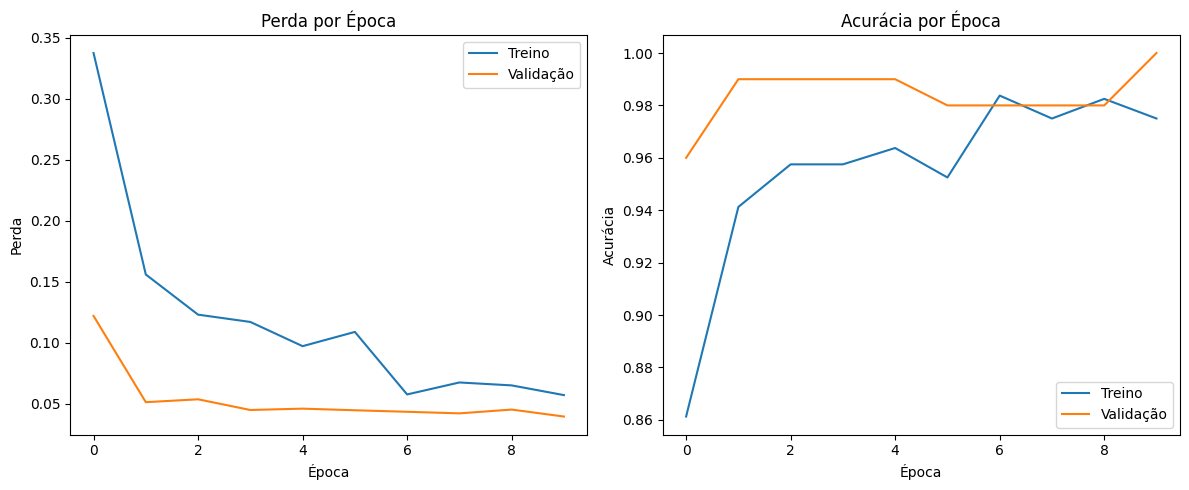

Avaliando o modelo no conjunto de teste...


Teste - Perda: 0.0480 Acurácia: 0.9800


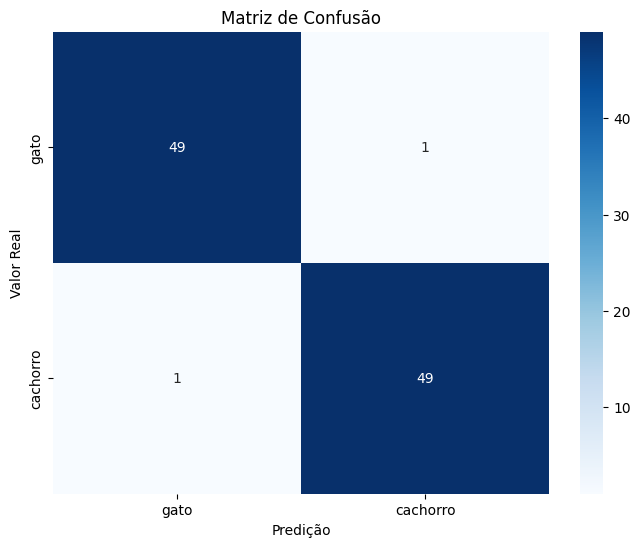


Relatório de Classificação:
              precision    recall  f1-score   support

        gato       0.98      0.98      0.98        50
    cachorro       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Visualizando algumas predições...


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


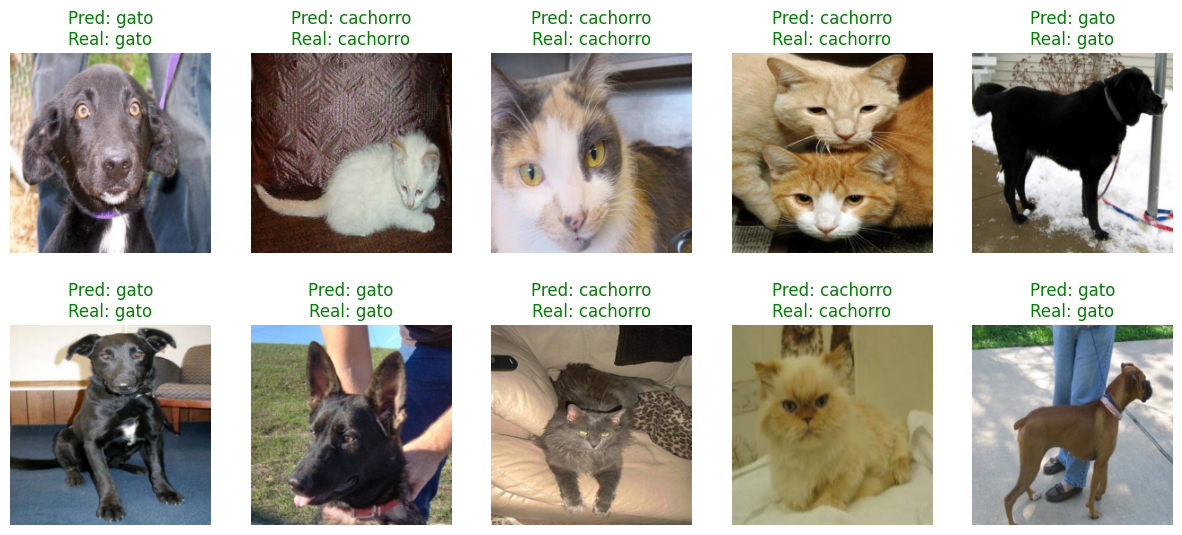

In [73]:
def main():
    # Carrega os dados
    print("Carregando os dados...")
    print("Dividindo em: 400 imagens para treino, 50 para validação e 50 para teste de cada classe...")
    train_loader, val_loader, test_loader, classes = load_data()

    # Cria o modelo
    print("Criando o modelo ResNet18...")
    model = create_model(num_classes=len(classes))

    # Define o critério de perda e otimizador
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.fc.parameters(), lr=LEARNING_RATE)

    # Define o scheduler para reduzir a taxa de aprendizado quando a performance estagna
    scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=3, verbose=True)

    # Treina o modelo
    print("Iniciando o treinamento...")
    model, train_losses, val_losses, train_accs, val_accs = train_model(
        model, train_loader, val_loader, criterion, optimizer, scheduler, NUM_EPOCHS
    )

    # Plota as métricas de treino
    plot_metrics(train_losses, val_losses, train_accs, val_accs)

    # Avalia o modelo no conjunto de teste
    print("Avaliando o modelo no conjunto de teste...")
    test_loss, test_acc, all_preds, all_labels = evaluate_model(model, test_loader, criterion, classes)

    # Visualiza algumas predições
    print("Visualizando algumas predições...")
    visualize_predictions(model, test_loader, classes)

if __name__ == "__main__":
    main()

Fim! 🔥